In [1]:
import stim
import sinter
from qldpc import codes
from qldpc.objects import Pauli
from qldpc.stim.circuit import memory_experiment
from qldpc.stim.noise_model import UniformNoiseModel
from qldpc.stim.syndrome_measurement import BareColorCircuit
from qldpc.stim.util import _det_basis_parity
from qldpc.stim.sinter_decoders import BPLSD

### Toric Code Z Basis Memory Experiment

In [2]:
sm_compiler = BareColorCircuit()

tasks: list[sinter.Task] = []
for d in [3,5,7]:
    ring_code = codes.RingCode(d)
    toric_code = codes.HGPCode(ring_code, ring_code)
    for p in [1e-3, 3e-3, 5e-3, 7e-3, 1e-2]:
        noise_model = UniformNoiseModel(p)
        tasks.append(sinter.Task(
            circuit=memory_experiment(toric_code, noise_model, sm_compiler, d, Pauli.Z),
            json_metadata={'d': d, 'p': p},
        ))


In [3]:
results = sinter.collect(
    num_workers=4,
    max_shots=10**6,
    max_errors=100,
    tasks=tasks,
    decoders=['bplsd'],
    custom_decoders={'bplsd': BPLSD(Pauli.Z, max_iter=30, bp_method="ms", lsd_method = 'lsd_cs', lsd_order = 0)}
)

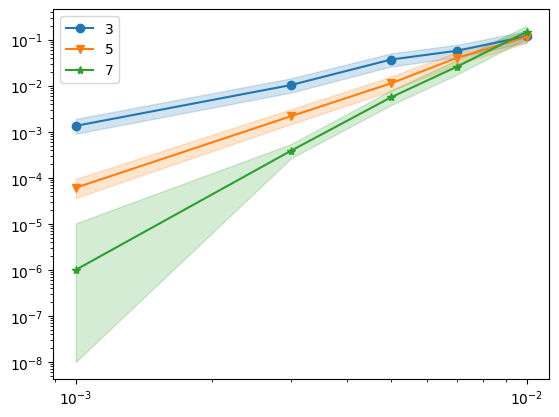

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=results,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
)
ax.loglog()
ax.legend()